In [1]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model

%reload_ext autoreload
%autoreload 2

## Train

Check if CUDA is available

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.memory_allocated()

0

In [5]:
torch.cuda.max_memory_allocated()

0

In [6]:
torch.cuda.memory_allocated()

0

In [7]:
torch.cuda.empty_cache()

In [11]:
dict_parameters = edict({'data_dir':'data/train/',
                         'val_data_dir':'data/val/',
                         'model_path':'data/models/monodepth_resnet18_001.pth',
                         'output_directory':'data/output/',
                         'input_height':256,
                         'input_width':512,
                         'model':'resnet18_md',
                         'pretrained':True,
                         'mode':'train',
                         'epochs':200,
                         'learning_rate':1e-4,
                         'batch_size': 2,
                         'adjust_lr':True,
                         'device':'cuda:0',
                         'do_augmentation':True,
                         'augm nt_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False,
                         'input_channels': 3,
                         'num_workers': 8,
                         'use_multiple_gpu': False})

In [12]:
model = Model(dict_parameters)
#model.load('data/models/monodepth_resnet18_001.pth')

Use a dataset with 837 images
Use a dataset with 10377 images


In [13]:
model.train()

Val_loss: 2.739922150916096
Epoch: 1 train_loss: 2.378039843224831 val_loss: 1.6290524330617706 time: 666.376 s
Model_saved
Epoch: 2 train_loss: 1.9891121416890554 val_loss: 1.3804514544839073 time: 685.095 s
Model_saved


KeyboardInterrupt: 

## Test the model

In [15]:
dict_parameters_test = edict({'data_dir':'data/test',
                              'model_path':'data/models/monodepth_resnet18_001.pth',
                              'output_directory':'data/output/',
                              'input_height':256,
                              'input_width':512,
                              'model':'resnet18_md',
                              'pretrained':False,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':4,
                              'use_multiple_gpu':False})
model_test = Model(dict_parameters_test)

Use a dataset with 4544 images


In [17]:
model_test.test()

Finished Testing


In [18]:
disp = np.load('data/output/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(4544, 256, 512)

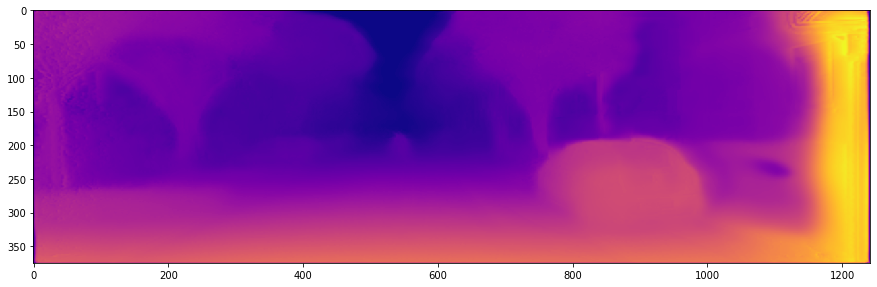

In [19]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [20]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [21]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               'pred_'+str(i)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [22]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')